<a href="https://colab.research.google.com/github/hxf829/paddle/blob/main/01_paddle_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
!pip install paddlepaddle

In [172]:
import paddle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
paddle.__version__

'1.8.5'

In [174]:
train_data = np.asarray(pd.read_csv('./sample_data/california_housing_train.csv'))
test_data = np.asarray(pd.read_csv('./sample_data/california_housing_test.csv'))

In [175]:
t_data = pd.read_csv('./sample_data/california_housing_train.csv')
#t_data = pd.read_csv('./sample_data/california_housing_test.csv')
t_data.shape
#t_data.latitude
#sns.scatterplot(y=t_data.population, x=t_data.median_house_value)
#sns.pointplot(data=t_data.housing_median_age)

(17000, 9)

In [176]:
maxmums, minmums, means = train_data.max(axis=0), train_data.min(axis=0), train_data.mean(axis=0)
for i in range(train_data[0].shape[0]):
    train_data[:, i] = (train_data[:, i] - minmums[i]) / (maxmums[i] - minmums[i] + 1e-05) 
for i in range(test_data[0].shape[0]):
    test_data[:, i] = (test_data[:, i] - minmums[i]) / (maxmums[i] - minmums[i] + 1e-05) 
print(train_data.shape, test_data.shape)

(17000, 9) (3000, 9)


In [177]:
train_x = train_data[:,:-1]
train_y = train_data[:,-1:]
print(train_data[0])
print(train_x[0])
print(train_x[0].shape)
print(train_y)

[0.999999   0.17534519 0.27450975 0.14788454 0.19894475 0.02836402
 0.07745437 0.06853004 0.10701193]
[0.999999   0.17534519 0.27450975 0.14788454 0.19894475 0.02836402
 0.07745437 0.06853004]
(8,)
[[0.10701193]
 [0.13422831]
 [0.14577466]
 ...
 [0.18268172]
 [0.14598084]
 [0.1641251 ]]


In [178]:
#model
#y = W*x + b
w = np.asarray([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]).reshape([8,1])
b = 0.01
y = np.dot(train_x[0], w) + b
print(w,b)
print(y)
print("mse", np.square(np.subtract(y, train_y[0])).mean() )

[[0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]] 0.01
[0.20710317]
mse 0.010018255762399097


In [179]:
class SimpleNetwork(object):
    def __init__(self, feature_nums):
        self.b = 0.01
        np.random.seed(0)
        self.w = np.random.randn(feature_nums, 1)
    def forward(self, x):
        return np.dot(x, self.w) + self.b
    def loss(self, y1, y2):
        return np.square(np.subtract(y1, y2)).mean()
    def gradient(self, x, y):
        z = self.forward(x)
        l = self.loss(z, y)
        gradient_w = (z-y)*x
        gradient_w = np.mean(gradient_w, axis=0)
        #gradient_w = gradient_w[:, np.newaxis]
        gradient_w = gradient_w.reshape(gradient_w.shape[0],1)
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)
        return l, gradient_w, gradient_b
    def update(self, gradient_w, gradient_b, lr):
        self.w = self.w - lr * gradient_w
        self.b = self.b - lr * gradient_b
    def train(self, train_data, test_data, batch_size=10, epoch=10, lr=0.1):
        train_loss = np.asarray([])
        test_loss = np.asarray([])
        np.random.shuffle(train_data)
        if batch_size > train_data.shape[0]:
            batch_size = train_data.shape[0]
        x = train_data[:batch_size,:-1]
        y = train_data[:batch_size,-1:]
        for i in range(epoch):
            train_l, gradient_w, gradient_b = self.gradient(x, y)
            test_l = self.test_loss(test_data)
            train_loss = np.append(train_loss, train_l)
            test_loss = np.append(test_loss, test_l)
            self.update(gradient_w, gradient_b, lr)
            print('epoch {}\ttrain loss: {}\ttest loss:{}'.format(i+1, train_l, test_l))
        return train_loss, test_loss
    def test_loss(self, test_data):
        x = test_data[:, :-1]
        y = test_data[:, -1:]
        z = self.forward(x)
        return self.loss(z, y)
            
    def __str__(self):
        return "w is :" + str(self.w) + '\nb is:' + str(b)
    

epoch 1	train loss: 2.253899196680952	test loss:2.2471722120101525
epoch 2	train loss: 1.6054250200118507	test loss:1.5988051535372985
epoch 3	train loss: 1.1595629608500224	test loss:1.1530637205909509
epoch 4	train loss: 0.8529023156454817	test loss:0.8465251256290646
epoch 5	train loss: 0.6418792514975711	test loss:0.6356186276790388
epoch 6	train loss: 0.49656492334858526	test loss:0.4904117811649458
epoch 7	train loss: 0.39639785218437257	test loss:0.3903415749156245
epoch 8	train loss: 0.3272520287898882	test loss:0.3212817210204265
epoch 9	train loss: 0.27942267349435823	test loss:0.2735278846410272
w: [ 1.39371684  0.21694869  0.60181215  2.18467317  1.79814808 -1.01058886
  0.88245304 -0.28601079] 
b: -0.6706873922000063


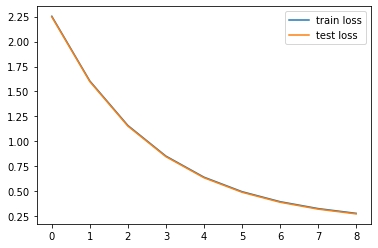

In [184]:
epoch = 9
lr = 0.1
batch_size = 30000
net = SimpleNetwork(8)
train_loss, test_loss = net.train(train_data, test_data, batch_size, epoch, lr)
plt.plot(np.arange(epoch), train_loss, label='train loss')
plt.plot(np.arange(epoch), test_loss, label='test loss')
plt.legend()
print('w:', net.w.reshape(w.shape[0]), '\nb:', net.b)

In [181]:
"""
# 调用上面定义的gradient函数，计算梯度
# 初始化网络
net = SimpleNetwork(8)
# 设置[w5, w9] = [-100., -100.]
net.w[5] = -100.0
net.w[7] = -100.0

z = net.forward(train_x)
loss = net.loss(z, train_y)
gradient_w, gradient_b = net.gradient(train_x, train_y)
gradient_w5 = gradient_w[5][0]
gradient_w7 = gradient_w[7][0]
print('point {}, loss {}'.format([net.w[5][0], net.w[7][0]], loss))
print('gradient {}'.format([gradient_w5, gradient_w7]))

# 在[w5, w9]平面上，沿着梯度的反方向移动到下一个点P1
# 定义移动步长 eta
eta = 0.1
# 更新参数w5和w9
net.w[5] = net.w[5] - eta * gradient_w5
net.w[7] = net.w[7] - eta * gradient_w7
# 重新计算z和loss
z = net.forward(train_x)
loss = net.loss(z, y)
gradient_w, gradient_b = net.gradient(train_x, train_y)
gradient_w5 = gradient_w[5][0]
gradient_w9 = gradient_w[7][0]
print('point {}, loss {}'.format([net.w[5][0], net.w[7][0]], loss))
print('gradient {}'.format([gradient_w5, gradient_w7]))
"""

"\n# 调用上面定义的gradient函数，计算梯度\n# 初始化网络\nnet = SimpleNetwork(8)\n# 设置[w5, w9] = [-100., -100.]\nnet.w[5] = -100.0\nnet.w[7] = -100.0\n\nz = net.forward(train_x)\nloss = net.loss(z, train_y)\ngradient_w, gradient_b = net.gradient(train_x, train_y)\ngradient_w5 = gradient_w[5][0]\ngradient_w7 = gradient_w[7][0]\nprint('point {}, loss {}'.format([net.w[5][0], net.w[7][0]], loss))\nprint('gradient {}'.format([gradient_w5, gradient_w7]))\n\n# 在[w5, w9]平面上，沿着梯度的反方向移动到下一个点P1\n# 定义移动步长 eta\neta = 0.1\n# 更新参数w5和w9\nnet.w[5] = net.w[5] - eta * gradient_w5\nnet.w[7] = net.w[7] - eta * gradient_w7\n# 重新计算z和loss\nz = net.forward(train_x)\nloss = net.loss(z, y)\ngradient_w, gradient_b = net.gradient(train_x, train_y)\ngradient_w5 = gradient_w[5][0]\ngradient_w9 = gradient_w[7][0]\nprint('point {}, loss {}'.format([net.w[5][0], net.w[7][0]], loss))\nprint('gradient {}'.format([gradient_w5, gradient_w7]))\n"